# Importing Required Packages


In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Specifying the directory of data


In [2]:
TEST_DIR = 'Data/test_data'
TRAIN_DIR = 'Data/train_data'

# Creating 2 functions: a) One Hot Encode b) Reverse


In [3]:
def ohc(arry):
    if arry == 1:
        return [1,0,0,0,0,0]
    if arry == 2:
        return [0,1,0,0,0,0]
    if arry == 3:
        return [0,0,1,0,0,0]
    if arry == 4:
        return [0,0,0,1,0,0]
    if arry == 5:
        return [0,0,0,0,1,0]
    if arry == 6:
        return [0,0,0,0,0,1]
    

def rev(arra):
    if arra == [1., 0., 0., 0., 0., 0.]:
        return 1
    elif arra == [0., 1., 0., 0., 0., 0.]:
        return 2
    elif arra == [0., 0., 1., 0., 0., 0.]:
        return 3
    elif arra == [0. ,0. ,0., 1., 0., 0.]:
        return 4
    elif arra == [0. ,0., 0., 0., 1., 0.]:
        return 5
    elif arra == [0. ,0., 0., 0., 0., 1.]:
        return 6

# Creating 2 arrays

In [4]:
train_y = np.zeros(10000)
train_x = np.zeros(10000)
train_y = train_y.tolist()
train_x = train_x.tolist()
for i,train_img_name in enumerate(os.listdir(TRAIN_DIR)):
    
    train_y[i] = ohc(int(train_img_name.split('.')[0].split('_')[-1]))
    train_img_arr = cv2.imread(os.path.join(TRAIN_DIR,train_img_name))   
    train_x[i] =  train_img_arr

    
test_y = np.zeros(200)
test_x = np.zeros(200)
test_y = test_y.tolist()
test_x = test_x.tolist()
for i,test_img_name in enumerate(os.listdir(TEST_DIR)):
    
    test_y[i] = int(test_img_name.split('.')[0].split('_')[-1])
    test_img_arr = cv2.imread(os.path.join(TEST_DIR,test_img_name))   
    test_x[i] =  test_img_arr

    
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)


train_x = train_x.astype('float64')
train_y = train_y.astype('float64')

test_x = test_x.astype('float64')

# Creating the model


In [5]:
model = Sequential()

model.add(Conv2D(64, (2,2), kernel_regularizer=l2(0.00001),strides=(1, 1),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (2,2),kernel_regularizer=l2(0.00001) ,strides=(1, 1),activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (2,2), activation = 'relu'))
model.add(Flatten())

model.add(Dense(128, input_shape = train_x[0].shape, activation = 'relu'))

model.add(Dense(6, activation = 'softmax'))

In [6]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [7]:
history = model.fit((255-train_x)/255,train_y,batch_size = 32,epochs = 5,validation_split = 0.025)

Epoch 1/5
305/305 [==============================] - 19s 63ms/step - loss: 1.1979 - accuracy: 0.4482 - val_loss: 1.0050 - val_accuracy: 0.5280
Epoch 2/5
305/305 [==============================] - 19s 62ms/step - loss: 0.9223 - accuracy: 0.5753 - val_loss: 0.8399 - val_accuracy: 0.6240
Epoch 3/5
305/305 [==============================] - 19s 62ms/step - loss: 0.6209 - accuracy: 0.7313 - val_loss: 0.6181 - val_accuracy: 0.7360
Epoch 4/5
305/305 [==============================] - 20s 65ms/step - loss: 0.4219 - accuracy: 0.8261 - val_loss: 0.6372 - val_accuracy: 0.6960
Epoch 5/5
305/305 [==============================] - 20s 66ms/step - loss: 0.2718 - accuracy: 0.8941 - val_loss: 0.5919 - val_accuracy: 0.7600


# Plotting graph to represent Training and Validation Data accuracy WRT epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


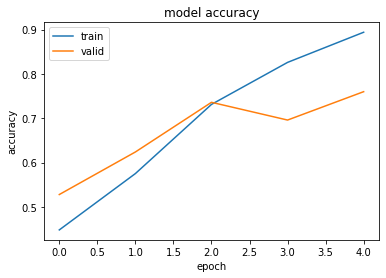

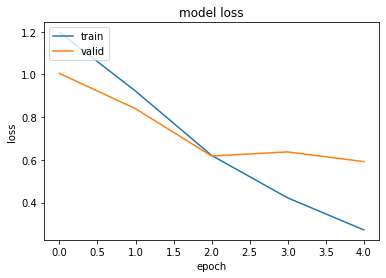

In [9]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [10]:
test_predictions = model.predict((255-test_x.reshape(200,64,64,3))/255)
test_predictions = np.argmax(test_predictions,axis = 1)+1

# Creating a function to plot a Confusion Matrix


In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [13]:
cm = confusion_matrix(y_true = test_y, y_pred = test_predictions)

# Plotting Confusion Matrix 


Confusion matrix, without normalization
[[29  0  0  0  0  0]
 [ 0 28  1  0  0  0]
 [ 0  4 26  3  0  0]
 [ 0  0  6 20  8  1]
 [ 0  0  1  3 21 14]
 [ 0  0  0  4  4 27]]


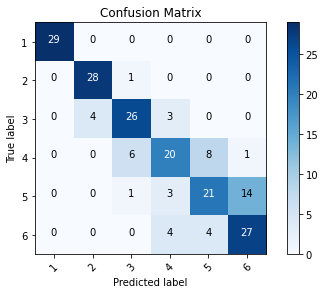

In [14]:
cm_plot_labels = ['1','2','3','4','5','6']
plot_confusion_matrix(cm=cm, classes = cm_plot_labels, title = 'Confusion Matrix')